# Shortest Path Finding

Text(0.5,1,'From shapefiles to NetworkX')

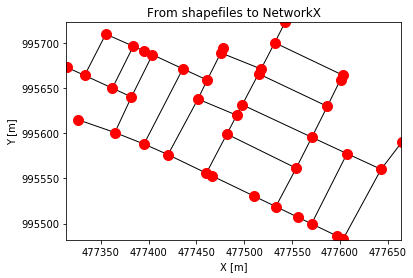

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import osgeo
from osgeo import gdal, ogr
G=nx.read_shp(r'C:\Users\Shanan\Desktop\Roads\streets.shp') 
pos = {k: v for k,v in enumerate(G.nodes())}
X=nx.Graph() #Empty graph
X.add_nodes_from(pos.keys()) #Add nodes preserving coordinates
l=[set(x) for x in G.edges()] #To speed things up in case of large objects
edg=[tuple(k for k,v in pos.items() if v in sl) for sl in l] #Map the G.edges start and endpoints onto pos
nx.draw_networkx_nodes(X,pos,node_size=100,node_color='r')
X.add_edges_from(edg)
nx.draw_networkx_edges(X,pos)
plt.xlim(477314, 477664) #This changes and is problem specific
plt.ylim(995482, 995723) #This changes and is problem specific
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('From shapefiles to NetworkX')

NetworkXError: Edge tuple (2149,) must be a 2-tuple or 3-tuple.

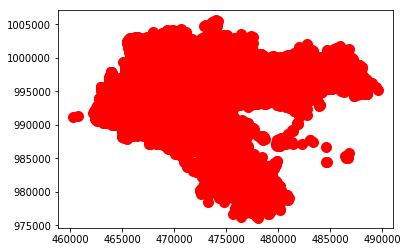

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import osgeo
from osgeo import gdal, ogr
G=nx.read_shp(r'C:\Users\Shanan\Desktop\Roads\aa_roads.shp') 
pos = {k: v for k,v in enumerate(G.nodes())}
X=nx.Graph() #Empty graph
X.add_nodes_from(pos.keys()) #Add nodes preserving coordinates
l=[set(x) for x in G.edges()] #To speed things up in case of large objects
edg=[tuple(k for k,v in pos.items() if v in sl) for sl in l] #Map the G.edges start and endpoints onto pos
nx.draw_networkx_nodes(X,pos,node_size=100,node_color='r')
X.add_edges_from(edg)
nx.draw_networkx_edges(X,pos)
plt.xlim(460282, 489562) #This changes and is problem specific
plt.ylim(976097, 1005590) #This changes and is problem specific
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('From shapefiles to NetworkX')

In [2]:
import networkx as nx
G = nx.read_shp(r'C:\Users\Shanan\Desktop\Roads.shp')
print(G.nodes())
print(G.edges())

RuntimeError: Unable to open C:\Users\Shanan\Desktop\Roads.shp

In [2]:
import geopandas as gpd
graph = gpd.read_file(r'C:\Users\Shanan\Desktop\Roads\streets.shp')
graph.head()
# first element
print (graph.iloc[0]['length'])

KeyError: 'length'

In [2]:
import networkx as nx

G=nx.Graph()

print(G.nodes())
print(G.edges())

print(type(G.nodes()))
print(type(G.edges()))

[]
[]
<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>


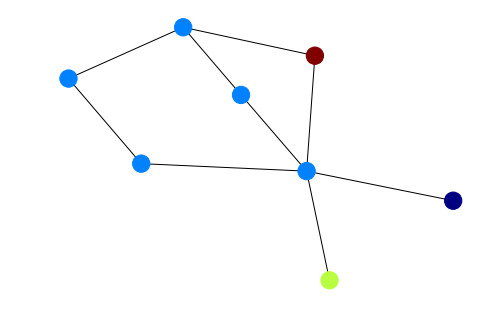

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()

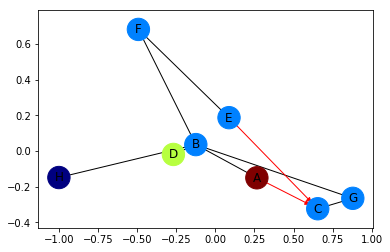

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()


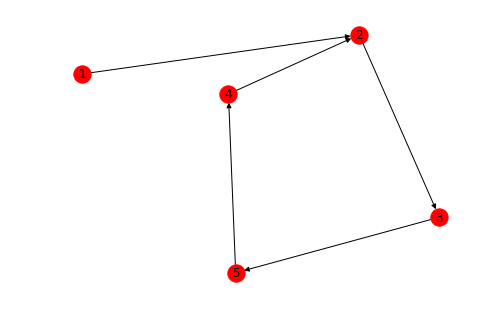

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_nodes_from([1,2,3,4,5])
g.add_edge(1,2)
g.add_edge(4,2)
g.add_edge(3,5)
g.add_edge(2,3)
g.add_edge(5,4)

nx.draw(g,with_labels=True)
plt.draw()
plt.show()

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
path = r'C:\Users\Shanan\Desktop\streets.shp'
G=nx.read_shp(path) 
nx.draw(G, with_labels=False)

ImportError: read_shp requires OGR: http://www.gdal.org/

In [1]:
import networkx

graph = networkx.read_shp(r"C:\Users\Shanan\Desktop\streets.shp")

ImportError: read_shp requires OGR: http://www.gdal.org/

In [1]:
from shapely.geometry import shape
import fiona
geoms =[shape(feature['geometry']) for feature in fiona.open(r"C:\Users\Shanan\Desktop\streets.shp")]
import itertools
# create a Graph
import networkx as nx
G = nx.Graph()
for line in geoms:
   for seg_start, seg_end in itertools.izip(list(line.coords),list(line.coords)[1:]):
    G.add_edge(seg_start, seg_end) 

OSError: no such file or directory: 'C:\\Users\\Shanan\\Desktop\\streets.shp'

In [6]:
from collections import defaultdict
from heapq import *

def dijkstra(edges, f, t):
    g = defaultdict(list)
    for l,r,c in edges:
        g[l].append((c,r))

    q, seen = [(0,f,())], set()
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == t: return (cost, path)

            for c, v2 in g.get(v1, ()):
                if v2 not in seen:
                    heappush(q, (cost+c, v2, path))

    return float("inf")

if __name__ == "__main__":
    edges = [
        ("A", "B", 7),
        ("A", "D", 5),
        ("B", "C", 8),
        ("B", "D", 9),
        ("B", "E", 7),
        ("C", "E", 5),
        ("D", "E", 15),
        ("D", "F", 6),
        ("E", "F", 8),
        ("E", "G", 9),
        ("F", "G", 11)
    ]

    print ("=== Dijkstra ===")
    print (edges)
    print ("A -> E:")
    print (dijkstra(edges, "A", "E"))
    print ("F -> G:")
    print (dijkstra(edges, "F", "G"))

=== Dijkstra ===
[('A', 'B', 7), ('A', 'D', 5), ('B', 'C', 8), ('B', 'D', 9), ('B', 'E', 7), ('C', 'E', 5), ('D', 'E', 15), ('D', 'F', 6), ('E', 'F', 8), ('E', 'G', 9), ('F', 'G', 11)]
A -> E:
(14, ('E', ('B', ('A', ()))))
F -> G:
(11, ('G', ('F', ())))


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.read_shp('C:\Users\MyName\MyFolder\TEST.shp') #Read shapefile as graph
pos = {xy: xy for xy in G.nodes()}
nx.draw_networkx_nodes(G,pos,node_size=100,node_color='r')
nx.draw_networkx_edges(G,pos,edge_color='k')
plt.xlim(450000, 470000)
plt.ylim(430000, 450000)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-7-e994ae93f956>, line 4)

In [6]:
import osmnx as ox
%matplotlib inline
ox.config(log_file=True, log_console=True, use_cache=True)
# from some place name, create a GeoDataFrame containing the geometry of the place
city = ox.gdf_from_place('Portland, Oregon, USA')
city

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-122.472025,45.652881,45.432535,-122.836749,"(POLYGON ((-122.72526 45.5255174, -122.7250967...","Portland, Multnomah County, Oregon, United Sta..."


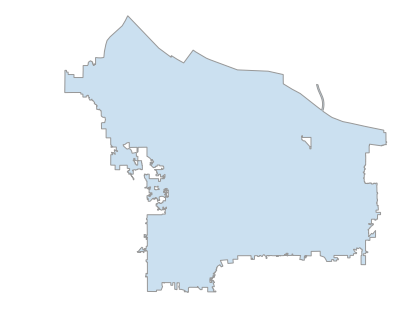

In [7]:
# save the retrieved data as a shapefile
ox.save_gdf_shapefile(city)
# project the geometry to the appropriate UTM zone (calculated automatically) then plot it
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city)

NameError: name 'ox' is not defined

In [9]:
from collections import defaultdict, deque


class Graph(object):
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}

    def add_node(self, value):
        self.nodes.add(value)

    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.distances[(from_node, to_node)] = distance


def dijkstra(graph, initial):
    visited = {initial: 0}
    path = {}

    nodes = set(graph.nodes)

    while nodes:
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node
        if min_node is None:
            break

        nodes.remove(min_node)
        current_weight = visited[min_node]

        for edge in graph.edges[min_node]:
            try:
                weight = current_weight + graph.distances[(min_node, edge)]
            except:
                continue
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge] = min_node

    return visited, path


def shortest_path(graph, origin, destination):
    visited, paths = dijkstra(graph, origin)
    full_path = deque()
    _destination = paths[destination]

    while _destination != origin:
        full_path.appendleft(_destination)
        _destination = paths[_destination]

    full_path.appendleft(origin)
    full_path.append(destination)

    return visited[destination], list(full_path)

if __name__ == '__main__':
    graph = Graph()

    for node in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        graph.add_node(node)

    graph.add_edge('A', 'B', 10)
    graph.add_edge('A', 'C', 20)
    graph.add_edge('B', 'D', 15)
    graph.add_edge('C', 'D', 30)
    graph.add_edge('B', 'E', 50)
    graph.add_edge('D', 'E', 30)
    graph.add_edge('E', 'F', 5)
    graph.add_edge('F', 'G', 2)

    print(shortest_path(graph, 'A', 'D')) # output: (25, ['A', 'B', 'D'])

(25, ['A', 'B', 'D'])
